In [75]:
import networkx as nx
from matplotlib import pyplot as plt


import treesampling.utils.graphs
from treesampling.algorithms import wilson_rst, kirchoff_rst, colbourn_rst
from treesampling.algorithms import random_spanning_tree as castaway_rst
from treesampling.utils.graphs import random_weakly_connected_graph, random_weakly_connected_k_subgraphs, tree_to_newick
import time
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
res = []
n_samples = 200
n = 20
# nodes
for n_blocks in [2, 5, 10]:
    # connection weakness
    for logw in np.linspace(-5, -3, 10)[::-1]:
        w = 10 ** logw
        # sampling
        G = random_weakly_connected_k_subgraphs(n, k=n_blocks, log_probs=False, weak_weight=w)
        for rst in [wilson_rst, castaway_rst]:
            times = []
            for _ in range(n_samples):
                start_time = time.time()
                T = rst(G, 0)
                total_time = time.time() - start_time
                times.append(total_time)

            avg_time = np.mean(times)
            sd_time = np.std(times)
            print(f'n={n}, rst={rst.__name__}, w={w}, n_blocks={n_blocks}, avg-time(s)={avg_time} +- {sd_time}')
            res.append({'n': n, 'rst': rst.__name__, 'w': w, 'time': avg_time, 'logw': logw, 'samples': n_samples, 'n_blocks': n_blocks})


n=20, rst=wilson_rst, w=0.001, n_blocks=2, avg-time(s)=0.008316413164138795 +- 0.008520705271531799


/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_39036/2651061535.py:15: DeprecationWarning: Use the new object CastawayRST with log_probs=False
  T = rst(G, 0)


n=20, rst=random_spanning_tree, w=0.001, n_blocks=2, avg-time(s)=0.06755656123161316 +- 0.004993794703499674
n=20, rst=wilson_rst, w=0.0005994842503189409, n_blocks=2, avg-time(s)=0.0181434965133667 +- 0.015606931562999844
n=20, rst=random_spanning_tree, w=0.0005994842503189409, n_blocks=2, avg-time(s)=0.06719198107719421 +- 0.0036998801826023417
n=20, rst=wilson_rst, w=0.00035938136638046257, n_blocks=2, avg-time(s)=0.022312796115875243 +- 0.019678594927414417
n=20, rst=random_spanning_tree, w=0.00035938136638046257, n_blocks=2, avg-time(s)=0.06963380575180053 +- 0.024762464190733125
n=20, rst=wilson_rst, w=0.00021544346900318823, n_blocks=2, avg-time(s)=0.02789310097694397 +- 0.02505357691451796
n=20, rst=random_spanning_tree, w=0.00021544346900318823, n_blocks=2, avg-time(s)=0.06651626229286194 +- 0.0010769741200484996
n=20, rst=wilson_rst, w=0.0001291549665014884, n_blocks=2, avg-time(s)=0.06673258662223816 +- 0.06382159065153264
n=20, rst=random_spanning_tree, w=0.0001291549665014

In [23]:
df = pd.DataFrame(res)
df

,n,rst,w,time,logw,samples,n_blocks
0,20,wilson_rst,0.001000,0.008316,-3.000000,200,2
1,20,random_spanning_tree,0.001000,0.067557,-3.000000,200,2
2,20,wilson_rst,0.000599,0.018143,-3.222222,200,2
3,20,random_spanning_tree,0.000599,0.067192,-3.222222,200,2
4,20,wilson_rst,0.000359,0.022313,-3.444444,200,2
5,20,random_spanning_tree,0.000359,0.069634,-3.444444,200,2
6,20,wilson_rst,0.000215,0.027893,-3.666667,200,2
7,20,random_spanning_tree,0.000215,0.066516,-3.666667,200,2
8,20,wilson_rst,0.000129,0.066733,-3.888889,200,2
9,20,random_spanning_tree,0.000129,0.066894,-3.888889,200,2


In [24]:
df['rst'] = df['rst'].map({'wilson_rst': 'Wilson', 'random_spanning_tree': 'Castaway'})
df

,n,rst,w,time,logw,samples,n_blocks
0,20,Wilson,0.001000,0.008316,-3.000000,200,2
1,20,Castaway,0.001000,0.067557,-3.000000,200,2
2,20,Wilson,0.000599,0.018143,-3.222222,200,2
3,20,Castaway,0.000599,0.067192,-3.222222,200,2
4,20,Wilson,0.000359,0.022313,-3.444444,200,2
5,20,Castaway,0.000359,0.069634,-3.444444,200,2
6,20,Wilson,0.000215,0.027893,-3.666667,200,2
7,20,Castaway,0.000215,0.066516,-3.666667,200,2
8,20,Wilson,0.000129,0.066733,-3.888889,200,2
9,20,Castaway,0.000129,0.066894,-3.888889,200,2


In [25]:
df.rename(columns={'rst': 'Algorithm', 'n_blocks': 'Blocks'}, inplace=True)

In [26]:
df.to_csv('weakly_connected_performance.csv')
# df = pd.read_csv('weakly_connected_performance.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


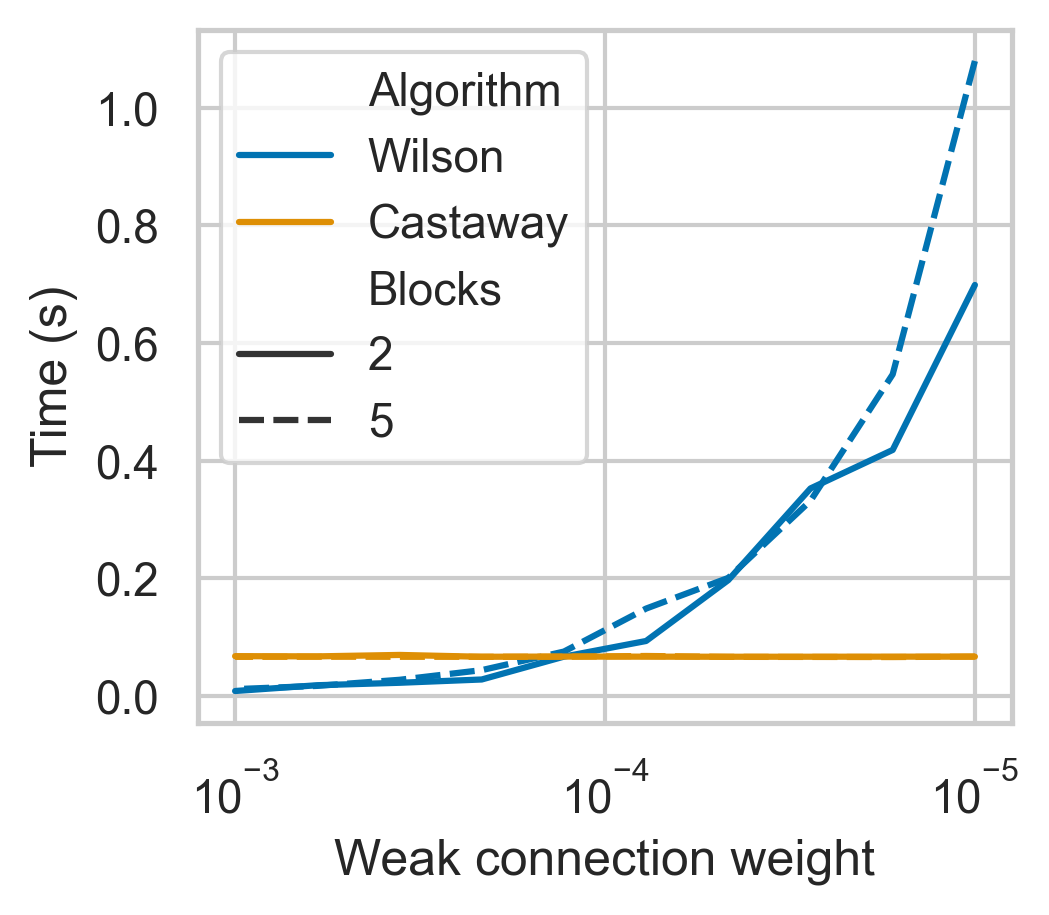

In [53]:
# ggplot style
sns.set_theme(style="whitegrid", palette='colorblind')
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)
# width to 3.5 inches
g = sns.lineplot(x='w', y='time', hue='Algorithm', style='Blocks', data=df[df['Blocks'] != 10], ax=ax)
g.set(xscale='log')
# g.set_title(f'{n} nodes, avg over {n_samples} draws')
g.set_xlabel('Weak connection weight')
# reverse x-axis
g.set_xlim(g.get_xlim()[::-1])
g.set_ylabel('Time (s)')
g
fig.savefig('weakly_connected_performance.eps', bbox_inches='tight')

## Quality of samples

the time differs, but the samples cover the same space.
The plot will show the number of unique trees found after each sample.
The proportion of sampled edges is also recorded.

In [56]:
# graph with log w fixed
graph = random_weakly_connected_graph(10, weak_weight=2e-4)

In [57]:
ss = 5000
trees_wilson = {}
edges_wilson = {}
for i in range(ss):
    tree = wilson_rst(graph)
    tnwk = tree_to_newick(tree)
    trees_wilson[tnwk] = trees_wilson.get(tnwk, 0) + 1
    assert nx.is_arborescence(tree)
    assert len(tree.edges()) == 9
    for e in tree.edges():
        edges_wilson[e] = edges_wilson.get(e, 0) + 1

edges_castaway = {}
trees_castaway = {}
for i in range(ss):
    tree = castaway_rst(graph, 0)
    tnwk = tree_to_newick(tree)
    trees_castaway[tnwk] = trees_castaway.get(tnwk, 0) + 1
    assert nx.is_arborescence(tree)
    assert len(tree.edges()) == 9
    for e in tree.edges():
        edges_castaway[e] = edges_castaway.get(e, 0) + 1


/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_39036/3917290701.py:16: DeprecationWarning: Use the new object CastawayRST with log_probs=False
  tree = castaway_rst(graph, 0)


In [58]:
edges_kirchoff = {}
for i in range(ss):
    tree = kirchoff_rst(graph, 0)
    for e in tree.edges():
        edges_kirchoff[e] = edges_kirchoff.get(e, 0) + 1


In [59]:
import itertools

df_edges = pd.DataFrame([{'edge': e, 'Wilson': edges_wilson.get(e, 0), 'Castaway': edges_castaway.get(e, 0),
                          # 'Kirchoff': edges_kirchoff.get(e, 0)
                          } for e in graph.edges()])
df_edges

,edge,Wilson,Castaway
0,"(0, 0)",0,0
1,"(0, 1)",80,61
2,"(0, 2)",1560,1574
3,"(0, 3)",326,334
4,"(0, 4)",2681,2691
...,...,...,...
95,"(9, 5)",1570,1628
96,"(9, 6)",0,0
97,"(9, 7)",326,351
98,"(9, 8)",0,1


In [60]:
from scipy.stats import wilcoxon, chisquare
wilcoxon(df_edges['Wilson'], df_edges['Castaway'])

WilcoxonResult(statistic=1071.0, pvalue=0.9921736520676586)

In [61]:
# wilcoxon(df_edges['Wilson'], df_edges['Kirchoff'])

In [62]:
# wilcoxon(df_edges['Castaway'], df_edges['Kirchoff'])

In [63]:
df_edges['Wilson'].sum(), df_edges['Castaway'].sum() #, df_edges['Kirchoff'].sum()

(45000, 45000)

In [64]:
# zeros in common?
# pair is (castaway count where wilson is zero, wilson count where castaway is zero)
df_edges[(df_edges['Wilson'] == 0)]['Castaway'].sum(), df_edges[(df_edges['Castaway'] == 0)]['Wilson'].sum()

(8, 1)

In [65]:
# plot the edges count (sorted by wilson) as grouped barplot
df_edges = df_edges.sort_values('Wilson', ascending=False)
df_edges_top10 = df_edges.head(10)
df_edges_top10 = df_edges_top10.melt(id_vars='edge', var_name='method', value_name='count')
df_edges_top10['edge'] = df_edges_top10['edge'].astype(str)
df_edges_top10

,edge,method,count
0,"(0, 8)",Wilson,3510
1,"(0, 4)",Wilson,2681
2,"(0, 6)",Wilson,2181
3,"(7, 9)",Wilson,2016
4,"(8, 6)",Wilson,1862
5,"(9, 3)",Wilson,1850
6,"(9, 1)",Wilson,1795
7,"(3, 7)",Wilson,1673
8,"(9, 5)",Wilson,1570
9,"(0, 2)",Wilson,1560


In [66]:
df_edges_top10.index

RangeIndex(start=0, stop=20, step=1)

In [67]:
df_non_zero = df_edges[(df_edges['Wilson'] > 0) & (df_edges['Castaway'] > 0)]
df_non_zero['Wilson'] / df_non_zero['Wilson'].sum() * df_non_zero['Castaway'].sum(), df_non_zero['Castaway']

(8     3509.453988
 4     2680.582946
 6     2180.660726
 79    2015.686393
 86    1861.710349
          ...     
 27      19.996889
 45      12.997978
 59       5.999067
 54       1.999689
 16       0.999844
 Name: Wilson, Length: 63, dtype: float64,
 8     3499
 4     2691
 6     2213
 79    1975
 86    1807
       ... 
 27      26
 45      13
 59       6
 54       1
 16       2
 Name: Castaway, Length: 63, dtype: int64)

In [68]:
# chisquare p-value
chisquare(df_non_zero['Wilson'] / df_non_zero['Wilson'].sum() * df_non_zero['Castaway'].sum(), df_non_zero['Castaway'])

Power_divergenceResult(statistic=73.25057972338509, pvalue=0.1552842218990061)

/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_39036/2926379952.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


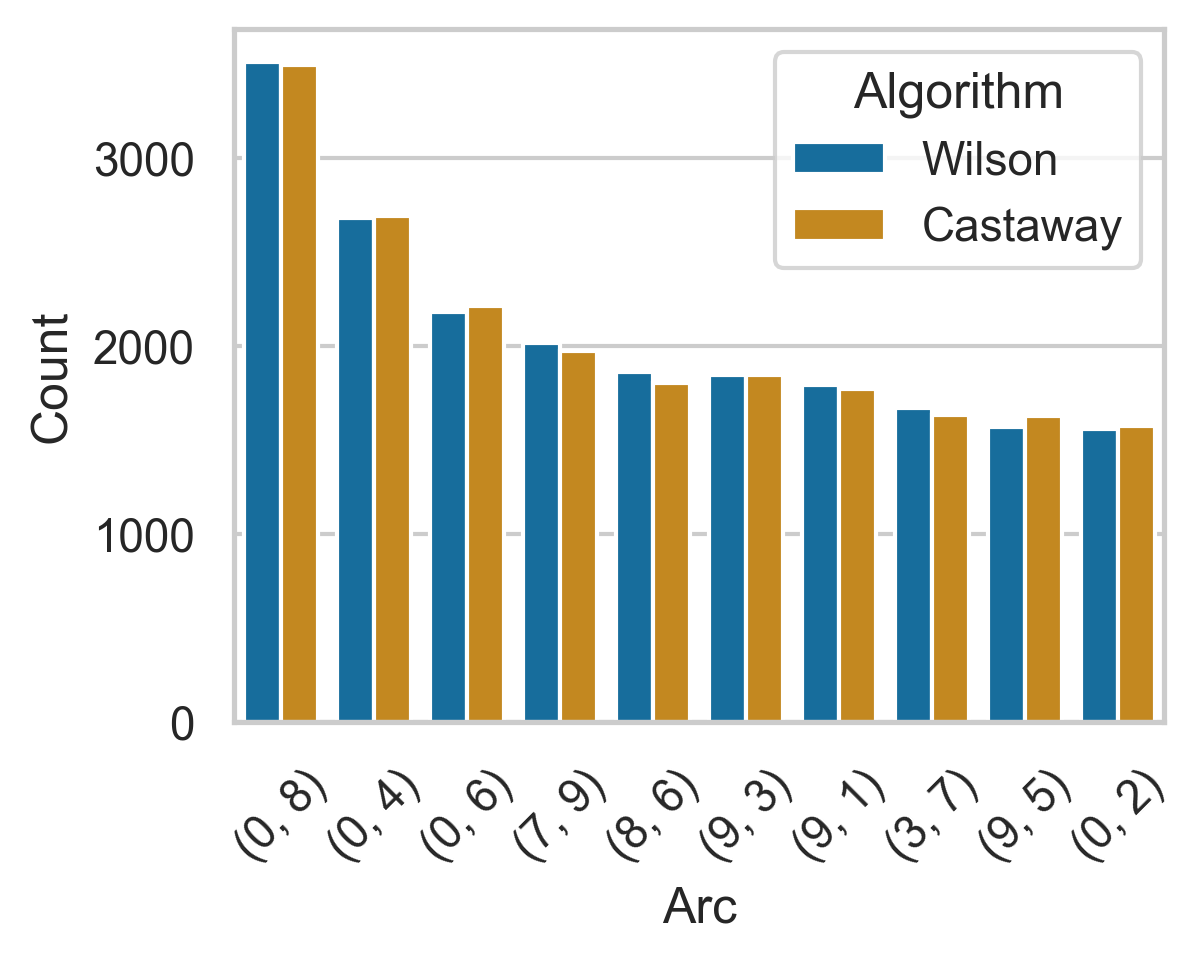

In [69]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
g = sns.barplot(data=df_edges_top10, x='edge', y='count', hue='method', ax=ax)
g.set_ylabel('Count')
g.set_xlabel('Arc')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
# annotate with wilcoxon p-value and statistics
# ax.annotate("(p-val: {:.3f})".format(wilcoxon(df_edges['Wilson'], df_edges['Castaway']).pvalue), (0.5, 0.5), xycoords='axes fraction')
ax.legend(title='Algorithm')
g
fig.savefig("edge_distribution.eps", bbox_inches='tight')

In [70]:
# plot trees
common_trees = set(trees_wilson.keys()).intersection(set(trees_castaway.keys()))
df_trees = pd.DataFrame([{'tree': t, 'Wilson': trees_wilson[t], 'Castaway': trees_castaway[t]} for t in common_trees])
df_trees

,tree,Wilson,Castaway
0,"(2,((((1)5,9)7)3)4,6,8)0",2,3
1,"((8)4,((((1,(3)9)7)5)2)6)0",1,1
2,"((((3,(7)5)9)1)4,((2)6)8)0",1,1
3,"(4,((((((5)7)3)9)1,2)6)8)0",1,1
4,"((((5,(1)9)7)3)2,4,(6)8)0",1,1
...,...,...,...
426,"(((3,((7)1)5)9)4,(2)6,8)0",1,1
427,"(((((9)1,3)5)7)4,((6)2)8)0",1,1
428,"(((6)2,(1,(5,7)3)9)4,8)0",1,1
429,"(4,(2,6,(1,3,(7)5)9)8)0",1,1


In [71]:
df_trees['Wilson'].sum(), df_trees['Castaway'].sum()

(488, 488)

In [72]:
# zeros?
df_trees_no_zero = df_trees[(df_trees['Wilson'] > 0) | (df_trees['Castaway'] > 0)]


In [73]:
df_trees = df_trees.sort_values('Castaway', ascending=False)
df_trees_top10 = df_trees.head(10)
df_trees_top10 = df_trees_top10.melt(id_vars='tree', var_name='Algorithm', value_name='count')
df_trees_top10

,tree,Algorithm,count
0,"(2,((((1)5,9)7)3)4,6,8)0",Wilson,2
1,"(((3,((5)1)9)7)4,((2)6)8)0",Wilson,2
2,"((((4)2,((1,3,5)9)7)6)8)0",Wilson,1
3,"(((((1,5)9)7)3)2,4,(6)8)0",Wilson,1
4,"(4,(2)6,(((7)5,(3)9)1)8)0",Wilson,2
5,"((2)4,(((((3)9)1,7)5)6)8)0",Wilson,1
6,"(2,(((5,(1)9)7)3)4,(6)8)0",Wilson,2
7,"((2)4,((((3)5,(1)9)7)6)8)0",Wilson,1
8,"((((5,(1,3)9)7)6)2,4,8)0",Wilson,1
9,"(4,((((5,(1,3)9)7)6)2)8)0",Wilson,1


/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_39036/2984418435.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


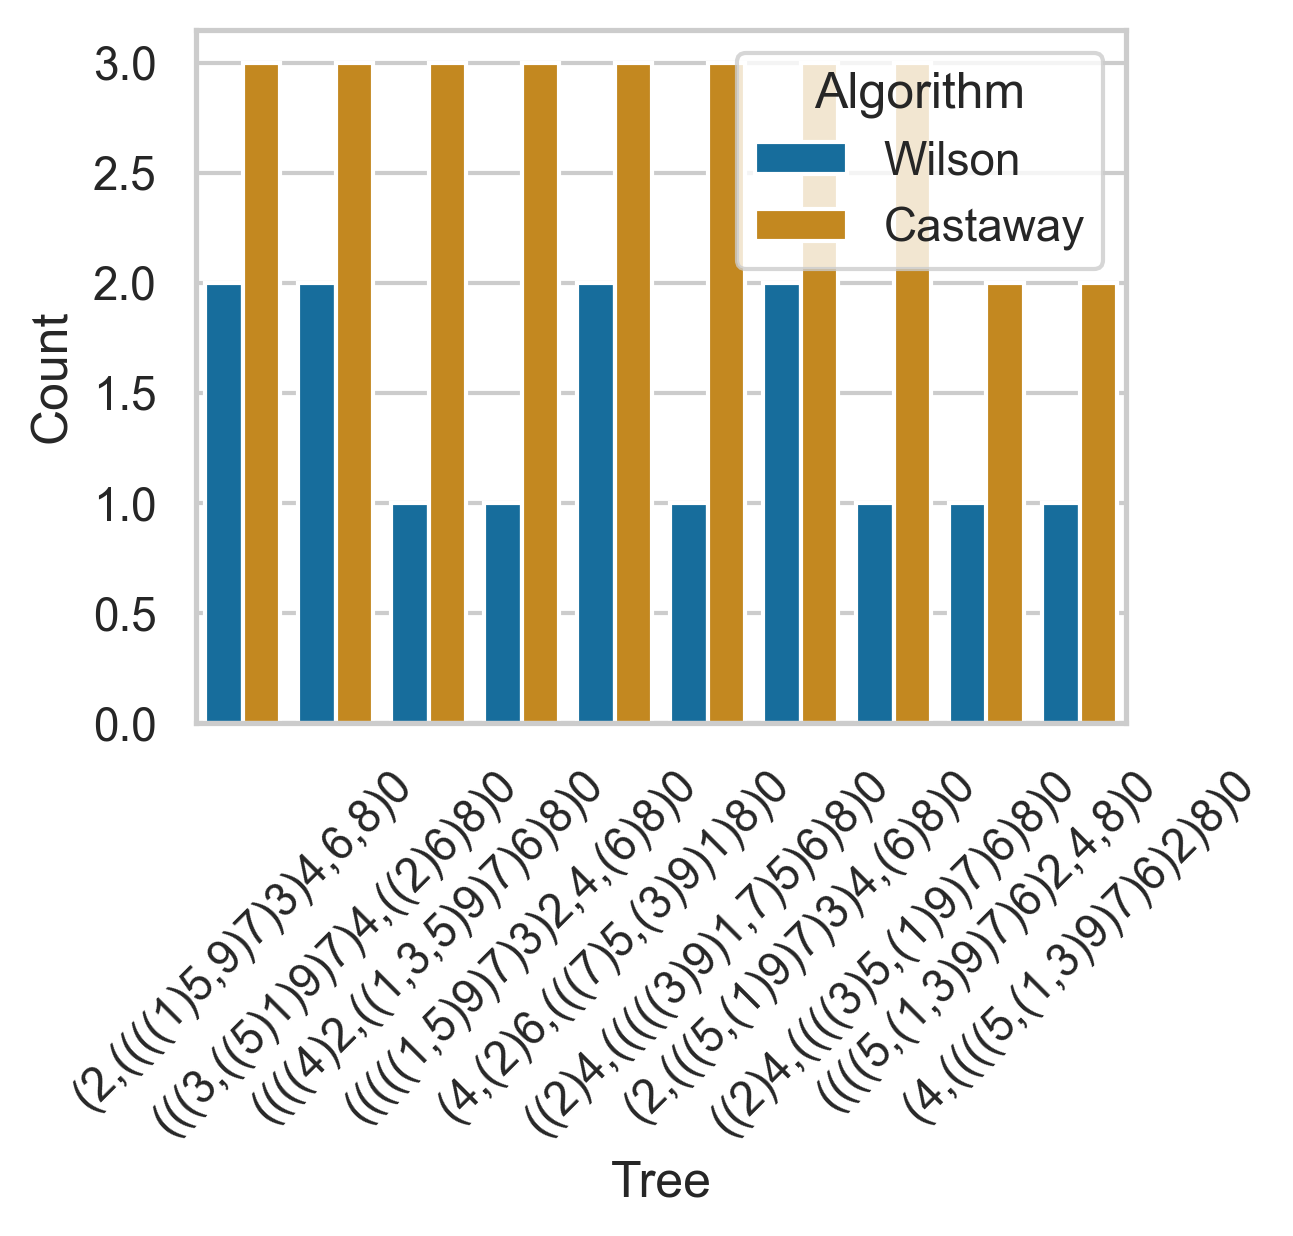

In [74]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
g = sns.barplot(data=df_trees_top10, x='tree', y='count', hue='Algorithm', ax=ax)
g.set_ylabel('Count')
g.set_xlabel('Tree')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
# annotate with wilcoxon p-value and statistics
# ax.annotate("(p-val: {:.3f})".format(wilcoxon(df_trees['Wilson'], df_trees['Castaway']).pvalue), (0.5, 0.5), xycoords='axes fraction')
fig.savefig("tree_distribution.png")

NameError: name 'N' is not defined